In [514]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Defining data and converting to pytorch tensors

In [515]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69,96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96,70]], dtype='float32')
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]]
,dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

### Splitting the data in train and test

In [516]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,targets,test_size = 0.3,random_state=47)

### Creating a dataloader for loading data while training

In [517]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(X_train,y_train)
loader = DataLoader(dataset=dataset)

### Defining Linear Regression Class

In [518]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()
    self.linear_input = nn.Linear(in_features=input_dim, out_features=512)
    self.linear_out = nn.Linear(in_features=512, out_features=output_dim)

  
  def forward(self,x):
    out = self.linear_input(x)
    out = self.linear_out(out)
    return out


In [519]:
# Defining the hyperparameters.
INPUT_DIMENSION = 3
OUTPUT_DIMENSION = 2
LR = 0.00009

EPOCHS = 225


In [520]:
lr = LinearRegression(INPUT_DIMENSION,OUTPUT_DIMENSION)

In [521]:
LOSS_FN = nn.MSELoss()
OPTIMIZER =  torch.optim.Adam(lr.parameters(), lr=LR)

In [522]:
def fit(lr,EPOCHS,LOSS_FN,OPTIMIZER,loader):
  converted_losses = []
  all_losses = []
  for i in range(EPOCHS):
    batch_losses = []
    for idx,(X,Y) in enumerate(loader):
      features = Variable(X).float()
      targets = Variable(Y).float()

      #  Forward pass
      predictions = lr(features)
      loss = LOSS_FN(predictions,targets)

      OPTIMIZER.zero_grad()
      loss.backward()
      OPTIMIZER.step()
      batch_losses.append(loss.data)
      all_losses.append(loss.data)
      # print(loss.data)
    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    converted_losses.append(mbl)
    if i%5==0:
      print("Epoch [{}/{}], Batch loss: {}".format(i, EPOCHS, mbl))
  return converted_losses
  

In [523]:
converted_losses = fit(lr,EPOCHS,LOSS_FN,OPTIMIZER,loader)

Epoch [0/225], Batch loss: 71.9739990234375
Epoch [5/225], Batch loss: 21.95599937438965
Epoch [10/225], Batch loss: 14.114999771118164
Epoch [15/225], Batch loss: 11.76200008392334
Epoch [20/225], Batch loss: 9.661999702453613
Epoch [25/225], Batch loss: 7.927999973297119
Epoch [30/225], Batch loss: 6.607999801635742
Epoch [35/225], Batch loss: 5.663000106811523
Epoch [40/225], Batch loss: 4.97599983215332
Epoch [45/225], Batch loss: 4.447999954223633
Epoch [50/225], Batch loss: 4.026000022888184
Epoch [55/225], Batch loss: 3.678999900817871
Epoch [60/225], Batch loss: 3.385999917984009
Epoch [65/225], Batch loss: 3.13100004196167
Epoch [70/225], Batch loss: 2.9049999713897705
Epoch [75/225], Batch loss: 2.697999954223633
Epoch [80/225], Batch loss: 2.50600004196167
Epoch [85/225], Batch loss: 2.3259999752044678
Epoch [90/225], Batch loss: 2.1570000648498535
Epoch [95/225], Batch loss: 1.9980000257492065
Epoch [100/225], Batch loss: 1.8489999771118164
Epoch [105/225], Batch loss: 1.71

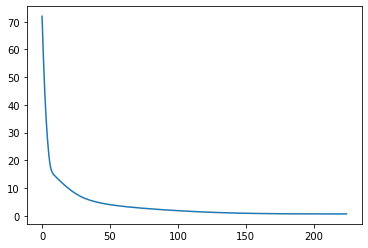

In [524]:
plt.plot(converted_losses)

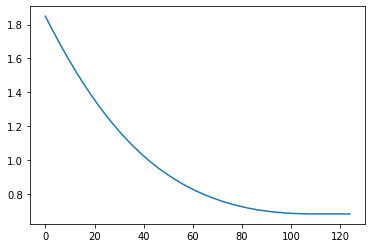

In [525]:
plt.plot(converted_losses[100:]) # Printing losses from 100th epoch

In [526]:
test_preds = lr(X_test)

In [527]:
test_loss = LOSS_FN(test_preds,y_test)
print("Test Loss",test_loss.detach().numpy())

Test Loss 0.51968616


In [528]:
X_test # picking a tensor from x test lets say index 0 i.e => [ 69.,  96.,  70.]

tensor([[ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.]])

In [529]:
y_test # Confirming the outputs of index 0 i.e => [103., 119.] 

tensor([[103., 119.],
        [ 56.,  70.],
        [119., 133.],
        [ 22.,  37.],
        [ 81., 101.]])

In [538]:
test_preds 
# we can see at the index 0 => [101.8740, 119.0757]
# the answer is 101.8740 ≈ 102.(Correct was 103.) and 119.0757 ≈ 119. (Correct was 119.)
# We can see the model performed very less error on testing data hence it is a accurate model

tensor([[101.8740, 119.0757],
        [ 57.1889,  70.3481],
        [118.7555, 133.0379],
        [ 21.1174,  37.0573],
        [ 82.1887, 100.6364]], grad_fn=<AddmmBackward0>)